In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from fitter import Fitter
import os
from os import path
# ?Fitter

# HSV mask method

In [3]:
# $$$-----AOI is for Area$Of$Interest------$$$ #
def getAOI(img_name):
    areas = []                                       # array of areas of interest
    img = cv2.imread(img_name, cv2.IMREAD_COLOR)     # image matrix
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # image matrix copy in RGB format
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)   # image matrix copy in HSV format
    lower_red = np.array([0,254,250])                # lower mask value
    upper_red = np.array([10,255,255])               # upper mask value

    mask_hsv = cv2.inRange(img_hsv, lower_red, upper_red)          # mask in hsv format
    masked_img = cv2.bitwise_and(img, img, mask=mask_hsv)          # mask applying
    grey_threshold = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)  # thresholded image
    contours, _ = cv2.findContours(grey_threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # contours recognition
    for ind, cnt in enumerate(contours[::2]):
        approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)   # counting edges of contour
        if len(approx) == 4:
            x,y,w,h = cv2.boundingRect(cnt)                                   # rectangle cordinates
            areas.append(cv2.cvtColor(img_rgb[y + 1:y - 1 + h, x + 1:x - 1 + w], cv2.COLOR_BGR2GRAY))
    return areas


## Collecting AOIs from every image in the folder

In [4]:
# $$$-------Gathering AOIs from every image of the folder!--------$$$ #
def gather_data(load_folder, save_folder):
    image_files = os.listdir(load_folder)
    data = []
    for img in image_files:
        img_path = os.path.join(load_folder, img)
        areas = getAOI(img_path)
        for ind in range(len(areas)):
            area_fname = f"{img.split('.')[0]}_{ind + 1}.bmp"
            area_fname = os.path.join(save_folder, area_fname)
            cv2.imwrite(area_fname, areas[ind])
            data.append(getNormArr(areas[ind].flatten()))   #norminate every image 
#             data.append(areas[ind].flatten())              #append with common image
    return data     # returning array of images

def getNormArr(a):
    normArr = []
    for i in range(len(a) - 1):
        z = int(a[i + 1]) - int(a[i])
        normArr.append(z)
    return normArr

#                          Gathering AOIs from every folder with disease
## C:\Users\User\Documents\notebooks\work_dir\linear_sensor_pat

In [6]:

save_dir = "C:\\Users\\User\\Documents\\notebooks\\work_dir\\linear_sensor_pat_AOI"
load_dir = "C:\\Users\\User\\Documents\\notebooks\\work_dir\\linear_sensor_pat"
result_dir = "C:\\Users\\User\\Documents\\notebooks\\work_dir\\linear_sensor_pat_result"
diseases_folders = os.listdir(load_dir)
if (not path.exists(save_dir) or  not path.isdir(save_dir)):
    os.mkdir(save_dir)
    for dis in diseases_folders:
        os.mkdir(os.path.join(save_dir, dis))
if not path.exists(save_dir):
    os.mkdir(result_dir)

diseases_folders = os.listdir(load_dir)
for dis in diseases_folders:
    dis_save = os.path.join(save_dir, dis)
    dis_load = os.path.join(load_dir, dis)
    data = gather_data(dis_load, dis_save)
    conc_data = np.concatenate(data)
    f = Fitter(conc_data, timeout=15, bins=len(set(conc_data)), distributions=['norm', 'kstwobign', 'rayleigh', 'rice', 'genlogistic'])
    f.fit()
    plt.figure(figsize=(10,6))
    sumry = f.summary()
    plt.savefig(os.path.join(result_dir, dis + "_plot_best.png"))
    sumry.to_excel(os.path.join(result_dir, dis + "_fitting_data_best.xlsx"))

Fitted norm distribution with error=0.00708154314021581)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1682: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


SKIPPED kstwobign distribution (taking more than 15 seconds)
Fitted rayleigh distribution with error=0.05414580675969397)
SKIPPED rice distribution (taking more than 15 seconds)
Fitted genlogistic distribution with error=0.006725262734891357)
kstwobign was not fitted. no parameters available
rice was not fitted. no parameters available
Fitted norm distribution with error=0.0037658029055690576)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2614: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


Fitted kstwobign distribution with error=0.03301577190878148)
Fitted rayleigh distribution with error=0.028267177624696792)
SKIPPED rice distribution (taking more than 15 seconds)
Fitted genlogistic distribution with error=0.0028999797911039137)
rice was not fitted. no parameters available
Fitted norm distribution with error=0.005070814880511382)
Fitted kstwobign distribution with error=0.02811808624431126)
Fitted rayleigh distribution with error=0.03460158797643991)
Fitted rice distribution with error=0.040634509694335706)
Fitted genlogistic distribution with error=0.004460673221831228)
Fitted norm distribution with error=0.006034915923672913)
Fitted kstwobign distribution with error=0.04370459213916584)
Fitted rayleigh distribution with error=0.049225935496768305)
Fitted rice distribution with error=0.008220951791570811)
Fitted genlogistic distribution with error=0.00583269829078981)
Fitted norm distribution with error=0.0043164967882618034)
SKIPPED kstwobign distribution (taking mor

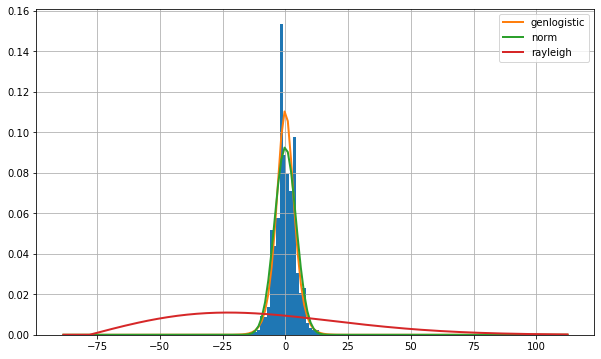

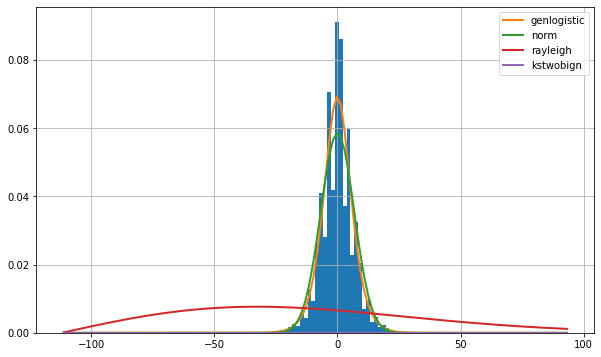

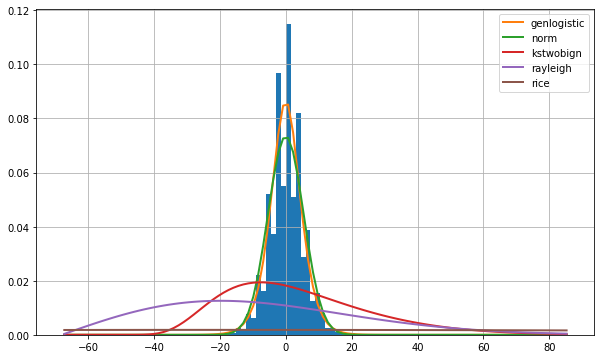

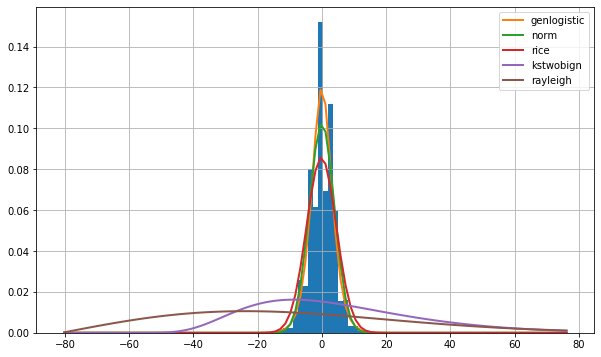

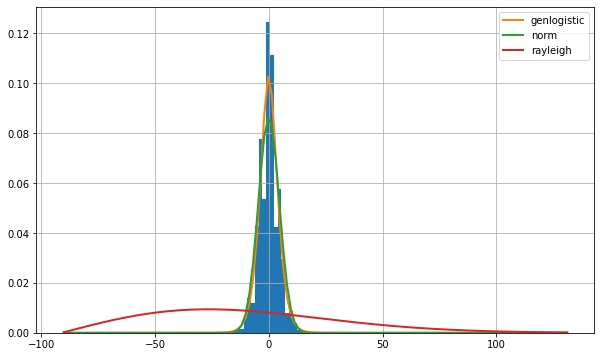

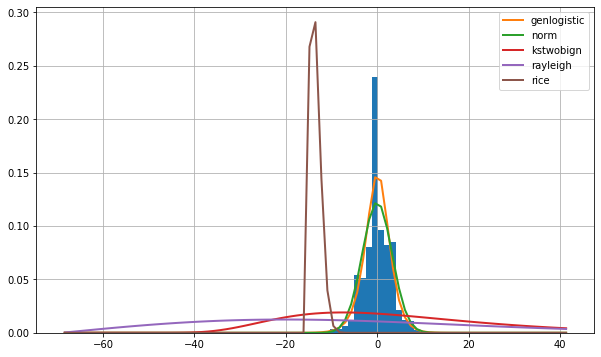

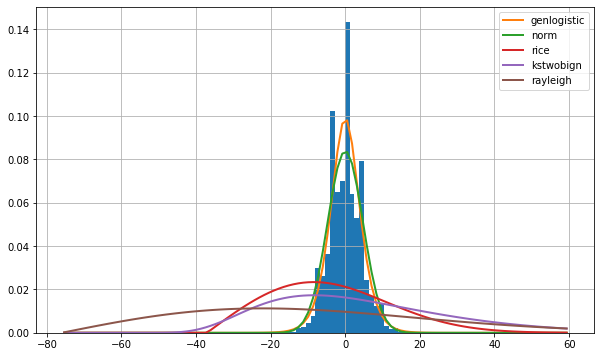

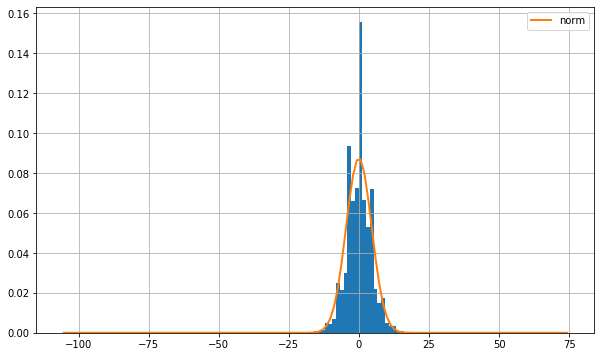